## Stats701 Homework 7, Winter 2018
### Pandas
### Katherine Wilkinson
#### kswilk@umich.edu

I discussed this homework with Sam Edds

#### 1. Warmup: Construction pandas objects

In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### 1.1 
Create a pandas Series object with indices given by the first 10 letters of the English
alphabet and values given by the first 10 primes

In [5]:
## Use prime generator from previous homework
def primes():
    #first prime is 2
    n = 2
    #create empty set to put primes in
    primes = set()
    while True:
        #loop through set
        for p in primes:
            #if n/p has no remainder, break while loop
            #that is, n is divisble by some number not itself or 1
            #print(n%p , n,p)
            if n % p == 0:
                break
        
        else:
            # if n%p != 0, add to primes set
            primes.add(n)
            #yield all n added to primes set
            yield n
        #add one to n 
        n = n + 1
p = primes()
#generate first 10 primes
p = [next(p) for _ in range(10)]

In [460]:
# Create index for first 10 letters of alphabet
idx = ['a','b','c','d','e','f','g','h','i','j']
#Create pandas series
s = pd.Series(p, index = idx)


a     2
b     3
c     5
d     7
e    11
f    13
g    17
h    19
i    23
j    29
dtype: int64

##### 1.2
Below is a table that might arise in a genetics experiment. Reconstruct this as a
pandas DataFrame.

In [64]:
## Create empty list to append values 1-12
score1 = []
for i in range(1,13):
    score1.append(i)

## create dictionary for score1 and score2
d = {'score1':pd.Series(score1),
    'score2':pd.Series([2,4,4,6,6,8,8,10,10,12,12,14])}

## create values for indices 
arrs = [['goat','goat','goat','goat','bird','bird',
        'bird','bird','llama','llama','llama','llama'],
        ['A','A','a','a','A','A','a','a','A','A','a','a'],
       ['A','a','A','a','A','a','A','a','A','a','A','a']]

##Arragne multiple indicies
idx = pd.MultiIndex.from_arrays(arrs, names = ['animal',
                                              'parent1', 'parent2'])

##Create series with score1 and above index
s = pd.Series(score1, index = idx)
d2 = {'score1':s}
#Make it dataframe
df = pd.DataFrame(d2)
##Add score2 to the data frame
df['score2'] = [2,4,4,6,6,8,8,10,10,12,12,14]
df

score1  score2
animal parent1 parent2                
goat   A       A             1       2
               a             2       4
       a       A             3       4
               a             4       6
bird   A       A             5       6
               a             6       8
       a       A             7       8
               a             8      10
llama  A       A             9      10
               a            10      12
       a       A            11      12
               a            12      14

#### 2. Working with pandas DataFrames

##### 2.1
Download the iris data set from the link above. Please include this file in your
submission. Read iris.csv into Python as a pandas DataFrame. Note that the
CSV file includes column headers. How many data points are there in this data set?
What are the data types of the columns? What are the column names? The column
names correspond to flower species names, as well as four basic measurements one
can make of a flower: the width and length of its petals and the width and length
of its sepal (the part of the pant that supports and protects the flower itself). How
many species of flower are included in the data?

In [463]:
iris = pd.read_csv('iris.csv')
iris.info()
iris.head()
iris['Species'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


array(['setosa', 'versicolor', 'virginica'], dtype=object)

* \# of Data points: 150
* Data types: 1st 4 columns are floats, last is object
* Column names:
    * Sepal.Length
    * Sepal.Width
    * Petal.Length
    * Petal.Width
    * Species
* Species of Flowers:
    * Setosa, Versicolor, Virginica 


##### 2.3
The data that I uploaded to my website, which you have downloaded, is based
on the data initially uploaded to the UC Irvine machine learning repository. It is
now known that this data contains errors in two of its rows (see the documentation
at https://archive.ics.uci.edu/ml/datasets/Iris). Using 1-indexing, these
errors are in the 35th and 38th rows. The 35th row should read 4.9,3.1,1.5,0.2,”Iris-setosa”,
where the fourth feature is incorrect as it appears in the file, and the 38th
row should read 4.9,3.6,1.4,0.1,”Iris-setosa”, where the second and third features are
incorrect as they appear in the file. Correct these entries of your DataFrame

In [464]:
# Change error in 34th Row
iris.iloc[34, iris.columns.get_loc('Petal.Width')] = 0.2

#Change errors in 37th Row
iris.iloc[37, iris.columns.get_loc('Sepal.Width')] = 2.6
iris.iloc[37, iris.columns.get_loc('Petal.Width')] = 1.4

##### 3.3
The iris dataset is commonly used in machine learning as a proving ground for
clustering and classification algorithms. Some researchers have found it useful to
use two additional features, called *Petal ratio* and *Sepal ratio*, defined as the ratio
of the petal length to petal width and the ratio of the sepal length to sepal width,
respectively. Add two columns to you DataFrame corresponding to these two new
features. Name these columns Petal.Ratio and Sepal.Ratio, respectively.

In [465]:
## Create two new columns for petal.ratio and sepal.ratio
iris['Petal.Ratio'] = iris['Petal.Length']/iris['Petal.Width']
iris['Sepal.Ratio'] = iris['Sepal.Length']/iris['Sepal.Width']
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Petal.Ratio,Sepal.Ratio
0,5.1,3.5,1.4,0.2,setosa,7.0,1.457143
1,4.9,3.0,1.4,0.2,setosa,7.0,1.633333
2,4.7,3.2,1.3,0.2,setosa,6.5,1.468750
3,4.6,3.1,1.5,0.2,setosa,7.5,1.483871
4,5.0,3.6,1.4,0.2,setosa,7.0,1.388889


##### 2.4
Save your corrected and extended iris DataFrame to a csv file called iris_corrected.csv.
Please include this file in your submission

In [466]:
## Save to csv file
iris.to_csv('iris_corrected.csv', index = False)
## Index name however seems to be created as a new unnamed column??
## How to make that not be the case? 
iris2 = pd.read_csv('iris_corrected.csv')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Petal.Ratio,Sepal.Ratio
0,5.1,3.5,1.4,0.2,setosa,7.0,1.457143
1,4.9,3.0,1.4,0.2,setosa,7.0,1.633333
2,4.7,3.2,1.3,0.2,setosa,6.5,1.468750
3,4.6,3.1,1.5,0.2,setosa,7.5,1.483871
4,5.0,3.6,1.4,0.2,setosa,7.0,1.388889


##### 2.5
Use a pandas aggregate operation to determine the mean, median, minimum, maximum
and standard deviation of the petal and sepal ratio for each of the three species
in the data set.

In [431]:
iris.groupby('Species')['Petal.Ratio','Sepal.Ratio'].agg(['mean',
                                                         'median',
                                                         'min',
                                                         'max',
                                                         'std'])

Petal.Ratio                                     Sepal.Ratio  \
                  mean    median       min   max       std        mean   
Species                                                                  
setosa        6.649429  7.000000  1.071429  15.0  2.783695    1.480658   
versicolor    3.242837  3.240385  2.666667   4.1  0.312456    2.160402   
virginica     2.780662  2.666667  2.125000   4.0  0.407367    2.230453   

                                                    
              median       min       max       std  
Species                                             
setosa      1.467708  1.268293  1.956522  0.131346  
versicolor  2.161290  1.764706  2.818182  0.228658  
virginica   2.169540  1.823529  2.961538  0.246992

#### 3. Plotting pandas DataFrames

##### 3.1
Use the built-in pandas plotting tools to make a box-and-whisker plot showing the
distribution of petal ratio and sepal ratio for each of the three species. Your plot
should have two subplots, one for petal ratio and one for sepal ratio. You may choose
the details of your plots (i.e., how to handle outliers, displaying mean vs median,
etc) however you think is best. Please include labels on your x- and y-axes and give
an appropriate title to your plot.

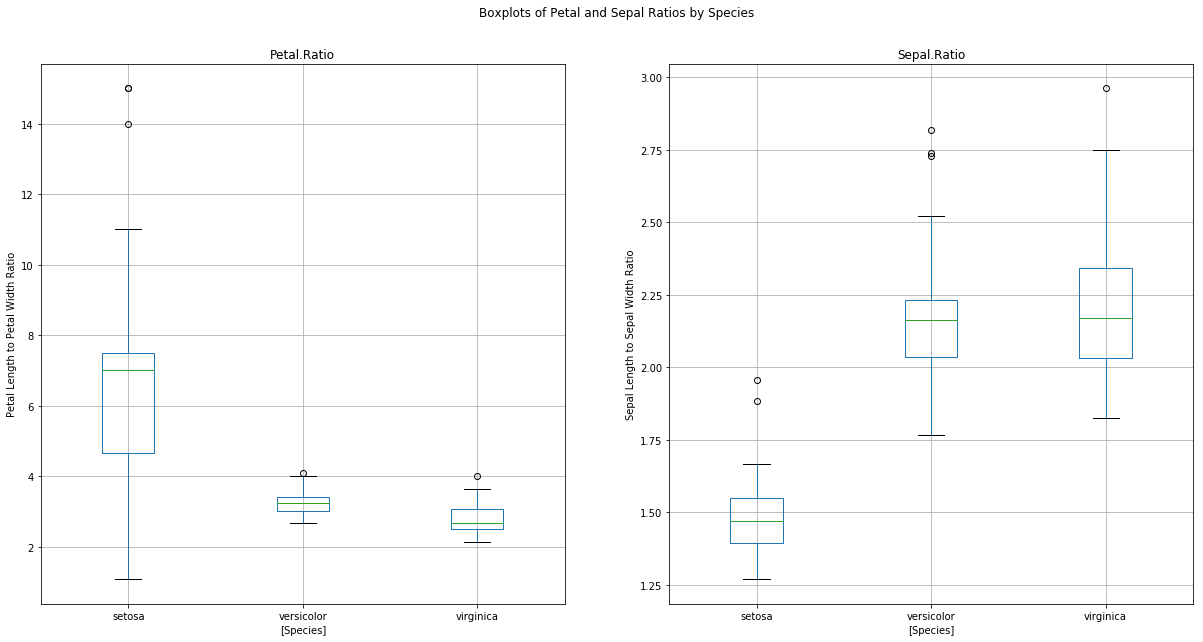

In [449]:
#iris = iris.set_index('Species')

#Set up subplots and figure sizes
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (20,10))

#plot Petal Ratio
a = iris.boxplot(column = ['Petal.Ratio'],by = ['Species'],
            ax = axes[0])

#plot Sepal Ratio
b = iris.boxplot(column = ['Sepal.Ratio'],by = ['Species'],
            ax = axes[1])

##Set y labels
a.set_ylabel('Petal Length to Petal Width Ratio')
b.set_ylabel('Sepal Length to Sepal Width Ratio')

#Set title
fig.suptitle('Boxplots of Petal and Sepal Ratios by Species')

_ = plt.show

##### 3.2
Use the built-in pandas plotting tools to make a scatter matrix plot for the four original
features (petal width, petal length, sepal width and sepal length). Each point in
the scatter plot should be colored according to its species. See the documentation
at https://pandas.pydata.org/pandas-docs/stable/visualization.html#
scatter-matrix-plot to get started.

In [451]:
#Import scatter matrix
from pandas.plotting import scatter_matrix

In [455]:
## Change type in iris to category
iris['Species'] = iris['Species'].astype('category')

## put species into classification coes (0,1,2) to plot
iris['Species_code'] = iris['Species'].cat.codes

array([0, 1, 2])

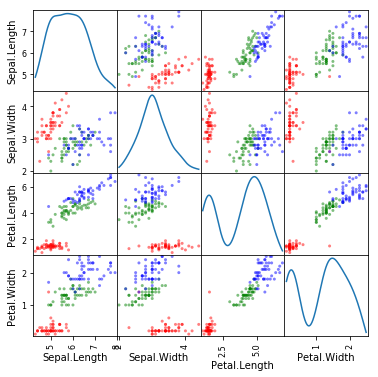

In [457]:
## Select just first 5 columns
iris_og = iris.iloc[:,0:5]

##Set colors for classification
colors_palette = {0: "red", 1: "green", 2: "blue"}
## Color by species code
colors = [colors_palette[c] for c in iris['Species_code']] 

##plot with scatter matrix
sm = scatter_matrix(iris_og, color = colors, diagonal = 'kde',
              figsize = (6,6))
    
#Show it, marvel at how pretty it is. Just look at those colors.
#Magnificent
_ = plt.show()